In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/Yes_Bank_Training.csv')
test  = pd.read_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/Yes_Bank_Test.csv')
sample= pd.read_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sample_submission.csv')
train.shape, test.shape, sample.shape

((31649, 18), (13562, 17), (13562, 2))

In [8]:
len(train)

31649

In [4]:
train.head(10)

,serial_number,age_in_years,job_description,marital_status,education_details,has_default,balance_in_account,housing_status,previous_loan,phone_type,date,month_of_year,call_duration,campaign_contacts,days_passed,previous_contact,poutcome_of_campaign,outcome
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,7,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,8,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,9,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,10,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


32    1455
31    1436
33    1320
35    1298
34    1287
36    1266
30    1203
37    1173
39    1072
38    1043
Name: age_in_years, dtype: int64


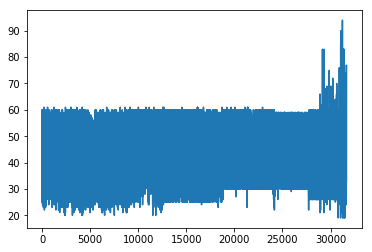

In [13]:
import matplotlib.pyplot as plt
print(train['age_in_years'].value_counts().head(10))
plt.plot(train['age_in_years'])
plt.show()

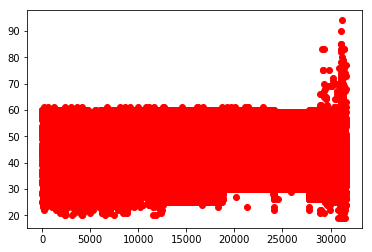

In [16]:
plt.scatter(range(len(train['age_in_years'])), train['age_in_years'], c='red')

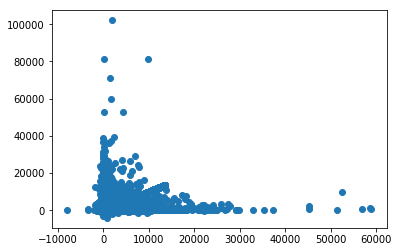

In [34]:
x = train.iloc[0:13562,0:17]._get_numeric_data()
x.shape, test.shape
plt.scatter(x,test._get_numeric_data())

In [5]:
train.isnull().sum(axis=0)

serial_number           0
age_in_years            0
job_description         0
marital_status          0
education_details       0
has_default             0
balance_in_account      0
housing_status          0
previous_loan           0
phone_type              0
date                    0
month_of_year           0
call_duration           0
campaign_contacts       0
days_passed             0
previous_contact        0
poutcome_of_campaign    0
outcome                 0
dtype: int64

In [6]:
train['outcome'].value_counts()/train.shape[0]*100

no     94.18623
yes     5.81377
Name: outcome, dtype: float64

In [8]:
train.isnull().sum()

serial_number           0
age_in_years            0
job_description         0
marital_status          0
education_details       0
has_default             0
balance_in_account      0
housing_status          0
previous_loan           0
phone_type              0
date                    0
month_of_year           0
call_duration           0
campaign_contacts       0
days_passed             0
previous_contact        0
poutcome_of_campaign    0
outcome                 0
dtype: int64

In [9]:
print(train.nunique())

serial_number           31649
age_in_years               67
job_description            12
marital_status              3
education_details           4
has_default                 2
balance_in_account       6405
housing_status              2
previous_loan               2
phone_type                  3
date                       31
month_of_year              11
call_duration            1469
campaign_contacts          48
days_passed               243
previous_contact           31
poutcome_of_campaign        4
outcome                     2
dtype: int64


In [10]:
print(train['poutcome_of_campaign'].value_counts())
train['phone_type'].value_counts()


unknown    29591
failure     1439
other        538
success       81
Name: poutcome_of_campaign, dtype: int64


cellular     17181
unknown      12765
telephone     1703
Name: phone_type, dtype: int64

In [11]:
train['num_outcome'] = np.where(train['outcome'] == 'no', 0,1) 
print(train['num_outcome'].value_counts())

loop = [train,test]

train_trimmed    = train.drop(['serial_number','poutcome_of_campaign','phone_type', 'outcome'], axis =1 )
test_trimmed     = test.drop(['serial_number','poutcome_of_campaign','phone_type'], axis =1 )
print(train_trimmed.shape, test_trimmed.shape)

train_dummy    = pd.get_dummies(train_trimmed)
print(train_dummy.shape)
train_dummy.columns
test_dummy     = pd.get_dummies(test_trimmed)
test_dummy.shape

0    29809
1     1840
Name: num_outcome, dtype: int64
(31649, 15) (13562, 14)
(31649, 44)


(13562, 44)

In [12]:
print(train_trimmed.nunique())
test_trimmed.nunique()

age_in_years            67
job_description         12
marital_status           3
education_details        4
has_default              2
balance_in_account    6405
housing_status           2
previous_loan            2
date                    31
month_of_year           11
call_duration         1469
campaign_contacts       48
days_passed            243
previous_contact        31
num_outcome              2
dtype: int64


age_in_years            76
job_description         12
marital_status           3
education_details        4
has_default              2
balance_in_account    4060
housing_status           2
previous_loan            2
date                    31
month_of_year           12
call_duration         1157
campaign_contacts       18
days_passed            552
previous_contact        39
dtype: int64

In [13]:
#print(test_dummy.columns)
train_dummy['month_of_year_sep'] = 0
train_dummy.shape

(31649, 45)

In [14]:
train_x = train_dummy.drop('num_outcome', axis = 1)
train_y = train_dummy['num_outcome']
print(train_x.shape, train_y.shape)
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(train_x,train_y, test_size = 0.3)
x_train.shape,y_train.shape,x_validate.shape,y_validate.shape

(31649, 44) (31649,)


((22154, 44), (22154,), (9495, 44), (9495,))

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_mod_1 = KNeighborsClassifier(n_neighbors=9)
knn_mod_1.fit(x_train,y_train)

knn_pred = knn_mod_1.predict(x_validate)

accuracy_score(y_validate, knn_pred)

#test_pred = knn_mod_1.predict(test_dummy)


0.9397577672459189

In [16]:
from sklearn.linear_model import PassiveAggressiveClassifier

knn_mod_1 = PassiveAggressiveClassifier()
knn_mod_1.fit(x_train,y_train)

acc_pred = knn_mod_1.predict(x_validate)

accuracy_score(y_validate, acc_pred)

#test_pred = knn_mod_1.predict()

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9394418114797262

In [36]:
sample.head(10)

,serial_number,outcome
0,1,yes
1,2,yes
2,3,yes
3,4,yes
4,5,yes
5,6,yes
6,7,yes
7,8,yes
8,9,yes
9,10,yes


In [132]:
sub_1 = pd.DataFrame({ 'Serial_number' : test['serial_number'], 
                      'outcome_num' : test_pred})
sub_1['outcome'] = np.where(sub_1['outcome_num'] == 1, 'yes', 'no')
sub_1 = sub_1.drop('outcome_num', axis = 1)

#sub_1.to_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_1.csv', index=False)
sub_1 = pd.read_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_1.csv')
sub_1['outcome'].value_counts()

no     13233
yes      329
Name: outcome, dtype: int64

In [23]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

predict_lr = model_lr.predict(x_validate)
predict_lr

accuracy_score(y_validate, predict_lr)*100

94.41811479726172

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
model_rf = RandomForestClassifier(n_estimators=600)
model_rf.fit(x_train, y_train)

predict_rf = model_rf.predict(x_validate)
predict_rf

print(accuracy_score(y_validate, predict_rf)*100)
print(classification_report(y_validate, predict_rf))

94.61822011585045
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      8920
          1       0.61      0.31      0.41       575

avg / total       0.94      0.95      0.94      9495



In [18]:
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

In [21]:
probs = pd.DataFrame(model_rf.predict_proba(x_validate),columns=['Neg_1', 'Pos_2'])
print(probs.head(10))
print(probs.shape)
for cut_off in np.linspace(0,1,11):
    print(cut_off)

      Neg_1     Pos_2
0  0.993333  0.006667
1  1.000000  0.000000
2  0.991667  0.008333
3  0.998333  0.001667
4  0.998333  0.001667
5  0.996667  0.003333
6  0.985000  0.015000
7  0.940000  0.060000
8  0.575000  0.425000
9  0.990000  0.010000
(9495, 2)
0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0


In [24]:
cut_offs = []
tpr      = []#true positive rate / sensitivity
fpr      = []#false positive rate/ specificity

for cut_off in np.linspace(0,1,11):
    test_pred2  = probs['Pos_2'].apply(lambda v: 1 if v > cut_off else 0)
    tn,fp,fn,tp = confusion_matrix(y_validate, test_pred2, labels =[0,1]).ravel()
    sensitivity = (tp)/(tp+fn)
    specificity = (tn)/(tn+fp)
    cut_offs.append(cut_off)
    tpr.append(sensitivity)
    fpr.append(1-specificity)
#print(cut_offs)
#print(tpr)
#print(sensitivity)
#print(tn,fp,fn,tp)
#print(fpr)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()
#tpr
#fpr

<Figure size 640x480 with 1 Axes>

In [25]:
x= pd.Series(fpr)
df_roc = pd.DataFrame({'cutoff':cut_offs,'fpr' : fpr,'tpr' : tpr ,'specificity' : 1 - x })
df_roc

,cutoff,fpr,tpr,specificity
0,0.0,0.855605,0.998261,0.144395
1,0.1,0.097870,0.876522,0.902130
2,0.2,0.062556,0.747826,0.937444
3,0.3,0.042601,0.627826,0.957399
4,0.4,0.026345,0.490435,0.973655
5,0.5,0.012668,0.307826,0.987332
6,0.6,0.004372,0.133913,0.995628
7,0.7,0.000897,0.027826,0.999103
8,0.8,0.000000,0.000000,1.000000
9,0.9,0.000000,0.000000,1.000000


In [26]:
df_roc['youden_index'] = df_roc['tpr'] + df_roc['specificity'] - 1
df_roc.sort_values(by='youden_index', ascending = False)

,cutoff,fpr,tpr,specificity,youden_index
1,0.1,0.097870,0.876522,0.902130,0.778652
2,0.2,0.062556,0.747826,0.937444,0.685270
3,0.3,0.042601,0.627826,0.957399,0.585225
4,0.4,0.026345,0.490435,0.973655,0.464089
5,0.5,0.012668,0.307826,0.987332,0.295158
0,0.0,0.855605,0.998261,0.144395,0.142655
6,0.6,0.004372,0.133913,0.995628,0.129541
7,0.7,0.000897,0.027826,0.999103,0.026929
8,0.8,0.000000,0.000000,1.000000,0.000000
9,0.9,0.000000,0.000000,1.000000,0.000000


In [27]:
cut_off = 0.2
test_pred3  = probs['Pos_2'].apply(lambda v: 1 if v > cut_off else 0)
#confusion_matrix(test_y, test_pred2, labels=[1,2])
tn,fp,fn,tp = confusion_matrix(y_validate,test_pred3).ravel()
sensitivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
print(specificity*100)
print(sensitivity*100)
print(tn,fp,fn,tp)
accuracy_score(y_validate,test_pred2)*100


93.74439461883408
74.78260869565217
8362 558 145 430


93.94418114797261

In [192]:
probs = pd.DataFrame(model_rf.predict_proba(test_dummy),columns=['Neg_1', 'Pos_2'])
probs.head(5)


,Neg_1,Pos_2
0,0.978333,0.021667
1,0.755000,0.245000
2,0.745000,0.255000
3,0.993333,0.006667
4,0.913333,0.086667


In [28]:
cut_off = 0.34
probs    = probs['Pos_2'].apply(lambda v: 1 if v > cut_off else 0)
probs_df = pd.DataFrame({'serial_number' : test['serial_number'], 
                      'outcome' : probs}, index = None)
probs_df['outcome'] = np.where(probs_df['outcome'] == 0, 'no','yes')
print(probs_df['outcome'].value_counts())
#probs_df.to_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_14.csv', index=False)

no     8837
yes    4725
Name: outcome, dtype: int64


In [100]:
#from sklearn.model_selection import GridSearchCV

#rf_model = RandomForestClassifier()
params = { 
    'n_estimators': [150,200,250,300,350,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth'   : [4,5,6,7,8],
    'criterion'   : ['gini', 'entropy'],
    'min_samples_split' : [4,5,6,7,8]
}
params
#tree_cv = GridSearchCV(rf_model, param_grid=params)
#tree_cv.fit(x_train,y_train)
#tree_cv.best_params_
#dint work well

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 150}

In [111]:
model_rf = RandomForestClassifier(criterion = 'entropy',
 max_features = 'sqrt',
 n_estimators= 250)
model_rf.fit(x_train, y_train)

predict_rf = model_rf.predict(x_validate)
predict_rf

print(accuracy_score(y_validate, predict_rf)*100)
print(classification_report(y_validate, predict_rf))

94.71300684570826
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8944
          1       0.62      0.24      0.34       551

avg / total       0.94      0.95      0.94      9495



In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
print(x_train.shape, x_validate.shape, test_dummy.shape)

(22154, 44) (9495, 44) (13562, 44)


In [31]:
scaler   = StandardScaler()
x_scale  = scaler.fit(x_train)
x_trn    = x_scale.transform(x_train)
x_val    = x_scale.transform(x_validate)
x_test   = x_scale.transform(test_dummy)
x_trn.shape, x_val.shape, x_test.shape

((22154, 44), (9495, 44), (13562, 44))

In [156]:
svc           = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)

# Train classifier
model_svc     = svc.fit(x_trn, y_train)
predict_svc   = model_svc.predict(x_val)
test_pred     = model_svc.predict(x_test)

print(accuracy_score(y_validate, predict_svc)*100)
print(classification_report(y_validate, predict_svc))

88.02527646129542
             precision    recall  f1-score   support

          0       0.99      0.88      0.93      8944
          1       0.31      0.89      0.46       551

avg / total       0.95      0.88      0.91      9495



In [160]:
svc_df = pd.DataFrame({'serial_number' : test['serial_number'], 
                      'outcome' : test_pred}, index = None)
svc_df['outcome'] = np.where(svc_df['outcome'] == 0, 'no','yes')
print(svc_df['outcome'].value_counts())
#svc_df.to_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_4.csv', index=False)

no     9714
yes    3848
Name: outcome, dtype: int64


In [161]:
svc           = SVC(class_weight='balanced', C=1.0)

# Train classifier
model_svc     = svc.fit(x_trn, y_train)
predict_svc   = model_svc.predict(x_val)
test_pred     = model_svc.predict(x_test)

print(accuracy_score(y_validate, predict_svc)*100)
print(classification_report(y_validate, predict_svc))

90.00526592943655
             precision    recall  f1-score   support

          0       0.99      0.90      0.94      8944
          1       0.35      0.85      0.50       551

avg / total       0.95      0.90      0.92      9495



In [163]:
svc_df_2            = pd.DataFrame({'serial_number' : test['serial_number'], 
                      'outcome' : test_pred}, index = None)
svc_df_2['outcome'] = np.where(svc_df_2['outcome'] == 0, 'no','yes')
print(svc_df_2['outcome'].value_counts())
svc_df_2.to_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_5.csv', index=False)

no     11360
yes     2202
Name: outcome, dtype: int64


In [165]:
model_rf = RandomForestClassifier(n_estimators=300)
model_rf.fit(x_train, y_train)
predict_rf = model_rf.predict(x_validate)
predict_rf

print(accuracy_score(y_validate, predict_rf)*100)
print(classification_report(y_validate, predict_rf))

94.89204844655082
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      8944
          1       0.63      0.29      0.40       551

avg / total       0.94      0.95      0.94      9495



In [169]:
feature_importances = pd.DataFrame(model_rf.feature_importances_,
                                   index = x_train.columns,
                                  columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(20)                                    

,importance
call_duration,0.377913
balance_in_account,0.104459
age_in_years,0.093071
date,0.089567
campaign_contacts,0.047885
month_of_year_mar,0.028254
month_of_year_oct,0.014806
education_details_secondary,0.012315
education_details_tertiary,0.011250
job_description_technician,0.011044


In [241]:
kaggle = train.copy()
kaggle['job_description'].nunique()
#kaggle


12

In [205]:
try_1 = kaggle.groupby('job_description').size()
print(try_1)

enc   = try_1/len(kaggle)
enc
print(enc)
kaggle['new'] = kaggle.job_description.map(enc)
kaggle['new'].value_counts()

job_description
admin.           3354
blue-collar      6948
entrepreneur     1160
housemaid         969
management       6705
retired          1232
self-employed    1164
services         2965
student           297
technician       5684
unemployed        950
unknown           221
dtype: int64
job_description
admin.           0.105975
blue-collar      0.219533
entrepreneur     0.036652
housemaid        0.030617
management       0.211855
retired          0.038927
self-employed    0.036778
services         0.093684
student          0.009384
technician       0.179595
unemployed       0.030017
unknown          0.006983
dtype: float64


0.219533    6948
0.211855    6705
0.179595    5684
0.105975    3354
0.093684    2965
0.038927    1232
0.036778    1164
0.036652    1160
0.030617     969
0.030017     950
0.009384     297
0.006983     221
Name: new, dtype: int64

In [206]:
from xgboost import XGBClassifier

In [207]:
xg = XGBClassifier()
# Train classifier
xg_fit           = xg.fit(x_trn, y_train)
predict_xg       = xg_fit.predict(x_val)
test_pred_xg     = xg_fit.predict(test_dummy)

print(accuracy_score(y_validate, predict_xg)*100)
print(classification_report(y_validate, predict_xg))

95.12374934175882
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      8944
          1       0.65      0.35      0.46       551

avg / total       0.94      0.95      0.94      9495



C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [208]:
xg_df               = pd.DataFrame({'serial_number' : test['serial_number'], 
                      'outcome' : test_pred_xg}, index = None)
xg_df['outcome'] = np.where(xg_df['outcome'] == 0, 'no','yes')
print(xg_df['outcome'].value_counts())
xg_df.to_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_15.csv', index=False)
#75.61

no     12606
yes      956
Name: outcome, dtype: int64


In [220]:
from sklearn.feature_selection import RFE, f_classif , RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


model_rf = RandomForestClassifier(n_estimators=200)
rfe = RFECV(model_rf,10)
rfe = rfe.fit(x_train, y_train)
#model_rf.fit(x_train, y_train)

predict_rfe = rfe.predict(x_validate)
predict_rfe

print(accuracy_score(y_validate, predict_rfe)*100)
print(classification_report(y_validate, predict_rfe))

94.83938915218536
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      8944
          1       0.62      0.29      0.40       551

avg / total       0.94      0.95      0.94      9495



In [221]:
rfe_test             = rfe.predict(test_dummy)
rfe_df               = pd.DataFrame({'serial_number' : test['serial_number'], 
                      'outcome' : rfe_test}, index = None)
rfe_df['outcome']    = np.where(rfe_df['outcome'] == 0, 'no','yes')
print(rfe_df['outcome'].value_counts())

rfe_df.to_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_rfe_2.csv', index=False)

no     12915
yes      647
Name: outcome, dtype: int64


In [230]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=300,n_jobs=-1)
bagging.fit(x_train, y_train)
#model_rf.fit(x_train, y_train)

predict_bagging = bagging.predict(x_validate)
predict_bagging

print(accuracy_score(y_validate, predict_bagging)*100)
print(classification_report(y_validate, predict_bagging))


94.89204844655082
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      8944
          1       0.59      0.40      0.48       551

avg / total       0.94      0.95      0.94      9495



In [237]:
probs_bag     = pd.DataFrame(bagging.predict_proba(test_dummy),columns=['Neg_1', 'Pos_2'])
print(probs_bag.head(5))
cut_off       = 0.20
probs_bag     = probs_bag['Pos_2'].apply(lambda v: 1 if v > cut_off else 0)
probs_df_bag  = pd.DataFrame({'serial_number' : test['serial_number'], 
                      'outcome' : probs_bag}, index = None)
probs_df_bag['outcome'] = np.where(probs_df_bag['outcome'] == 0, 'no','yes')
print(probs_df_bag['outcome'].value_counts())
#print(classification_report(y_validate, probs_bag))

probs_df_bag.to_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_bagging_3.csv', index=False)

      Neg_1     Pos_2
0  0.973333  0.026667
1  0.786667  0.213333
2  0.623333  0.376667
3  1.000000  0.000000
4  0.876667  0.123333
no     10217
yes     3345
Name: outcome, dtype: int64


# 16-02-2019
train,test,x_trn,x_val

In [37]:
train_16th = train.drop(['outcome'],axis = 1)
train_16th.head(10)

,serial_number,age_in_years,job_description,marital_status,education_details,has_default,balance_in_account,housing_status,previous_loan,phone_type,date,month_of_year,call_duration,campaign_contacts,days_passed,previous_contact,poutcome_of_campaign,num_outcome
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
5,6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,7,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0
7,8,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,0
8,9,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,0
9,10,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,0


(31649, 17) (13562, 17)
unknown    65.450886
failure     3.182854
other       1.189976
success     0.179160
Name: poutcome_of_campaign, dtype: float64
unknown    16.296919
failure     7.657429
success     3.162947
other       2.879830
Name: poutcome_of_campaign, dtype: float64


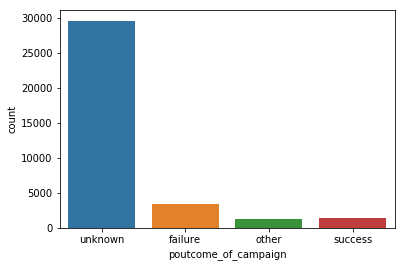

In [55]:
train_wo_op = train_16th.drop('num_outcome', axis = 1)
print(train_wo_op.shape, test.shape)
whole_list = [train_wo_op,test]

import seaborn as sns
for w in whole_list:
    print(w['poutcome_of_campaign'].value_counts()/45211*100)
    sns.countplot(w['poutcome_of_campaign'])

In [65]:
for unknown in whole_list:
    print(unknown[unknown == 'unknown'].count())
            

serial_number               0
age_in_years                0
job_description           221
marital_status              0
education_details        1272
has_default                 0
balance_in_account          0
housing_status              0
previous_loan               0
phone_type              12765
date                        0
month_of_year               0
call_duration               0
campaign_contacts           0
days_passed                 0
previous_contact            0
poutcome_of_campaign    29591
dtype: int64
serial_number              0
age_in_years               0
job_description           67
marital_status             0
education_details        585
has_default                0
balance_in_account         0
housing_status             0
previous_loan              0
phone_type               255
date                       0
month_of_year              0
call_duration              0
campaign_contacts          0
days_passed                0
previous_contact           0
poutcome_of_c

In [80]:
print(train_16th[train_16th['num_outcome'] == 0]['education_details'].value_counts()/
      train_16th[train_16th['num_outcome'] == 0].shape[0]*100)
print(train_16th[train_16th['num_outcome'] == 1]['education_details'].value_counts()/
     train_16th[train_16th['num_outcome'] == 1].shape[0]*100)                  
print(train_16th['education_details'].value_counts())
print(test['education_details'].value_counts())

#so we will lable encode this column starting from secondary 3 tertiary 2 and so on

secondary    51.695797
tertiary     28.333725
primary      15.894528
unknown       4.075950
Name: education_details, dtype: float64
secondary    48.532609
tertiary     35.380435
primary      12.989130
unknown       3.097826
Name: education_details, dtype: float64
secondary    16303
tertiary      9097
primary       4977
unknown       1272
Name: education_details, dtype: int64
secondary    6899
tertiary     4204
primary      1874
unknown       585
Name: education_details, dtype: int64


In [77]:
print(train_16th['phone_type'].value_counts())
print(test['phone_type'].value_counts())

print(train_16th[train_16th['num_outcome'] == 0]['phone_type'].value_counts()/
      train_16th[train_16th['num_outcome'] == 0].shape[0]*100)
print(train_16th[train_16th['num_outcome'] == 1]['phone_type'].value_counts()/
     train_16th[train_16th['num_outcome'] == 1].shape[0]*100)                  


#we will label encode cellular as 3, telephone as 2 and uk as 1

cellular     17181
unknown      12765
telephone     1703
Name: phone_type, dtype: int64
cellular     12104
telephone     1203
unknown        255
Name: phone_type, dtype: int64
cellular     53.554296
unknown      41.155356
telephone     5.290349
Name: phone_type, dtype: float64
cellular     66.141304
unknown      27.010870
telephone     6.847826
Name: phone_type, dtype: float64


In [79]:
print(train_16th['job_description'].value_counts())
test['job_description'].value_counts()
#create dummy

blue-collar      6948
management       6705
technician       5684
admin.           3354
services         2965
retired          1232
self-employed    1164
entrepreneur     1160
housemaid         969
unemployed        950
student           297
unknown           221
Name: job_description, dtype: int64


blue-collar      2784
management       2753
technician       1913
admin.           1817
services         1189
retired          1032
student           641
self-employed     415
unemployed        353
entrepreneur      327
housemaid         271
unknown            67
Name: job_description, dtype: int64

In [81]:
train.head(10)

,serial_number,age_in_years,job_description,marital_status,education_details,has_default,balance_in_account,housing_status,previous_loan,phone_type,date,month_of_year,call_duration,campaign_contacts,days_passed,previous_contact,poutcome_of_campaign,outcome,num_outcome
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
5,6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0
6,7,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,0
7,8,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,0
8,9,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,0
9,10,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,0


In [85]:
print(train_16th[train_16th['education_details'] == 'primary']['job_description'].value_counts())
print(test[test['education_details'] == 'primary']['job_description'].value_counts())
print('---------------')


print(train_16th[train_16th['education_details'] == 'secondary']['job_description'].value_counts())
print(test[test['education_details'] == 'secondary']['job_description'].value_counts())
print('---------------')


print(train_16th[train_16th['education_details'] == 'tertiary']['job_description'].value_counts())
print(test[test['education_details'] == 'tertiary']['job_description'].value_counts())
print('---------------')




blue-collar      2785
housemaid         513
retired           412
services          262
management        226
unemployed        210
admin.            150
entrepreneur      137
technician        123
self-employed     110
unknown            43
student             6
Name: job_description, dtype: int64
blue-collar      973
retired          383
housemaid        114
services          83
management        68
admin.            59
unemployed        47
entrepreneur      46
student           38
technician        35
self-employed     20
unknown            8
Name: job_description, dtype: int64
---------------
technician       3983
blue-collar      3715
admin.           2788
services         2458
management        872
retired           584
unemployed        522
self-employed     460
entrepreneur      412
housemaid         297
student           156
unknown            56
Name: job_description, dtype: int64
blue-collar      1656
admin.           1431
technician       1246
services          999
retired 

In [184]:
#train['merged_edu_job'] = train['job_description'].map(str) + train['education_details']
#train = train.drop('merged_edu_job', axis = 1)

train['merged_edu_job_2'] = train[['job_description','education_details']].apply(lambda x: ' '.join(x), axis=1)
test['merged_edu_job_2'] = test[['job_description','education_details']].apply(lambda x: ' '.join(x), axis=1)


print(train['merged_edu_job_2'].nunique())
train.head(10)

48


,serial_number,age_in_years,job_description,marital_status,education_details,has_default,balance_in_account,housing_status,previous_loan,phone_type,date,month_of_year,call_duration,campaign_contacts,days_passed,previous_contact,poutcome_of_campaign,outcome,num_outcome,merged_edu_job_2
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,management tertiary
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,technician secondary
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,entrepreneur secondary
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,blue-collar unknown
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,unknown unknown
5,6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0,management tertiary
6,7,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,0,management tertiary
7,8,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,0,entrepreneur tertiary
8,9,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,0,retired primary
9,10,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,0,technician secondary


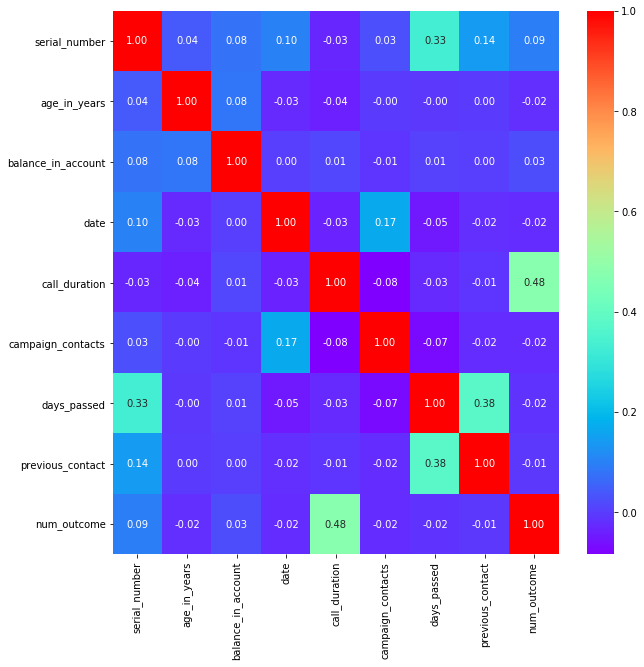

In [95]:
corr_m = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_m, cmap='rainbow', annot=True, fmt=".2f")

4918 train
0 train
3785
0


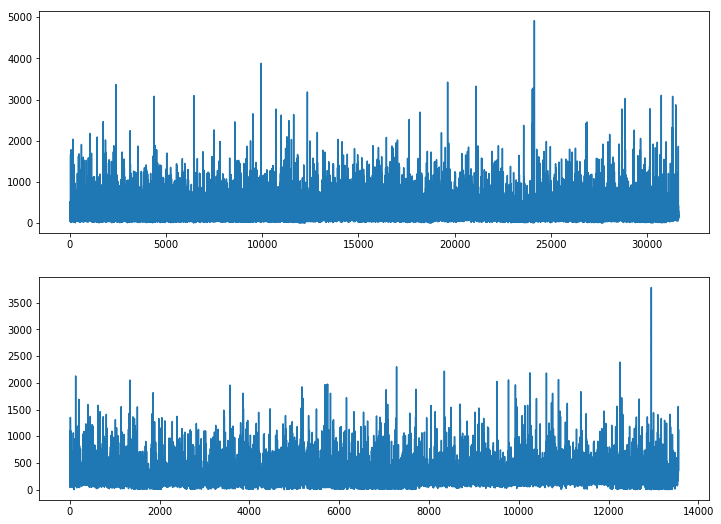

In [114]:
print('{} train' .format(train['call_duration'].max()))
print('{} train' .format(train['call_duration'].min()))
print(test['call_duration'].max())
print(test['call_duration'].min())


plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
plt.plot(train['call_duration'])
plt.subplot(2,1,2)
plt.plot(test['call_duration'])


In [109]:
call_check = train[train['num_outcome']==1]['call_duration'].agg({'min','max','count'})
print(call_check)

call_check_0 = train[train['num_outcome']==0]['call_duration'].agg({'min','max','count'})
call_check_0 




min         8
count    1840
max      3881
Name: call_duration, dtype: int64


min          0
count    29809
max       4918
Name: call_duration, dtype: int64

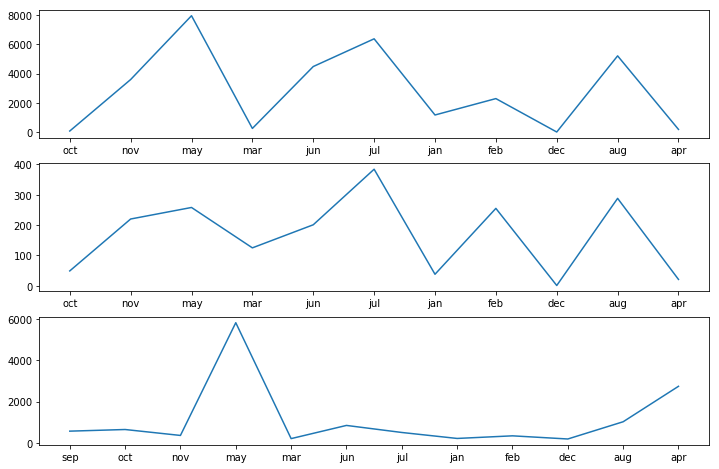

,month_of_year,num_outcome
5,jul,0.012133
1,aug,0.009100
8,may,0.008152
3,feb,0.008057
9,nov,0.006951
6,jun,0.006351
7,mar,0.003950
10,oct,0.001548
4,jan,0.001201
0,apr,0.000664


In [168]:
month = train.groupby('month_of_year')['num_outcome'].count().reset_index().sort_values('month_of_year', ascending = False)

#print(month)

ones = train[train['num_outcome'] == 1].groupby('month_of_year')['num_outcome'].count().reset_index().sort_values('month_of_year', ascending = False)
#print(ones)
month_test = test.groupby('month_of_year').size().reset_index().sort_values('month_of_year', ascending = False)
#print(month_test)


plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.plot(month['month_of_year'],month['num_outcome'])
plt.subplot(3,1,2)
plt.plot(ones['month_of_year'],ones['num_outcome'])
plt.subplot(3,1,3)
plt.plot(month_test['month_of_year'],month_test[0])
plt.show()

one_percent = train[train['num_outcome'] == 1].groupby('month_of_year')['num_outcome'].size()/train.shape[0]
one_percent = pd.DataFrame(one_percent).reset_index().sort_values('num_outcome', ascending = False)
one_percent

In [138]:
train.head(100)

,serial_number,age_in_years,job_description,marital_status,education_details,has_default,balance_in_account,housing_status,previous_loan,phone_type,date,month_of_year,call_duration,campaign_contacts,days_passed,previous_contact,poutcome_of_campaign,outcome,num_outcome,merged_edu_job_2
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,management tertiary
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,technician secondary
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,entrepreneur secondary
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,blue-collar unknown
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,unknown unknown
5,6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0,management tertiary
6,7,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,0,management tertiary
7,8,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,0,entrepreneur tertiary
8,9,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,0,retired primary
9,10,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,0,technician secondary


In [151]:
print(train['campaign_contacts'].unique())

campaign = train.groupby('campaign_contacts').size()
campaign
campaign_ones = train[train['num_outcome'] == 1].groupby('campaign_contacts').size()/train.shape[0]
campaign_ones

#conversion reduces as number of calls increase

[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


campaign_contacts
1     0.021865
2     0.016051
3     0.007078
4     0.005308
5     0.001991
6     0.001959
7     0.000916
8     0.000695
9     0.000569
10    0.000379
11    0.000379
12    0.000126
13    0.000190
14    0.000126
15    0.000126
16    0.000063
17    0.000158
20    0.000032
21    0.000032
24    0.000032
29    0.000032
32    0.000032
dtype: float64

In [152]:
train['previous_contact'].value_counts()

0      29591
1        706
2        574
3        262
4        182
5         91
6         56
7         46
8         33
9         24
13        12
12         9
11         9
10         9
14         7
15         7
16         5
27         4
18         3
17         3
23         2
24         2
20         2
25         2
29         2
37         1
21         1
275        1
51         1
26         1
38         1
Name: previous_contact, dtype: int64

In [202]:
train.columns
train_final = train.drop(['serial_number','outcome','poutcome_of_campaign','date','job_description','education_details','previous_contact','days_passed'], axis = 1)
print(train_final.shape)
test_final = test.drop(['serial_number','poutcome_of_campaign','date','job_description','education_details','previous_contact','days_passed'], axis = 1)
test_final.shape



#train_final['month_of_year'].unique()

(31649, 12)


(13562, 11)

In [203]:
train_final['month_of_year'] = train_final['month_of_year'].replace({'dec':0, 'apr':1,'jan':2,'oct':3,
                                                                   'mar':4,'jun':5,'nov':6,'feb':7,'may':8,'aug':9,'jul':10})

test_final['month_of_year'] = test_final['month_of_year'].replace({'dec':0, 'apr':1,'jan':2,'oct':3,
                                                                   'mar':4,'jun':5,'nov':6,'feb':7,'may':8,'aug':9,'jul':10,
                                                                  'sep':-1})
print(test_final['month_of_year'].value_counts())
print(test_final.dtypes)
print(train_final.dtypes)

#print(train_final['month_of_year'].value_counts())
test_final['month_of_year'].value_counts()

 8     5809
 1     2742
 9     1032
 5      855
 3      658
-1      579
 10     515
 6      372
 7      353
 2      227
 4      219
 0      201
Name: month_of_year, dtype: int64
age_in_years           int64
marital_status        object
has_default           object
balance_in_account     int64
housing_status        object
previous_loan         object
phone_type            object
month_of_year          int64
call_duration          int64
campaign_contacts      int64
merged_edu_job_2      object
dtype: object
age_in_years           int64
marital_status        object
has_default           object
balance_in_account     int64
housing_status        object
previous_loan         object
phone_type            object
month_of_year          int64
call_duration          int64
campaign_contacts      int64
num_outcome            int32
merged_edu_job_2      object
dtype: object


 8     5809
 1     2742
 9     1032
 5      855
 3      658
-1      579
 10     515
 6      372
 7      353
 2      227
 4      219
 0      201
Name: month_of_year, dtype: int64

In [181]:
test_final['month_of_year']

,age_in_years,marital_status,has_default,balance_in_account,housing_status,previous_loan,phone_type,month_of_year,call_duration,campaign_contacts,num_outcome,merged_edu_job_2
0,58,married,no,2143,yes,no,unknown,8,261,1,0,management tertiary
1,44,single,no,29,yes,no,unknown,8,151,1,0,technician secondary
2,33,married,no,2,yes,yes,unknown,8,76,1,0,entrepreneur secondary
3,47,married,no,1506,yes,no,unknown,8,92,1,0,blue-collar unknown
4,33,single,no,1,no,no,unknown,8,198,1,0,unknown unknown
5,35,married,no,231,yes,no,unknown,8,139,1,0,management tertiary
6,28,single,no,447,yes,yes,unknown,8,217,1,0,management tertiary
7,42,divorced,yes,2,yes,no,unknown,8,380,1,0,entrepreneur tertiary
8,58,married,no,121,yes,no,unknown,8,50,1,0,retired primary
9,43,single,no,593,yes,no,unknown,8,55,1,0,technician secondary


In [208]:
train_dummies = pd.get_dummies(train_final)
test_dummies  = pd.get_dummies(test_final)
train_x = train_dummies.drop('num_outcome', axis = 1)
train_y = train_dummies['num_outcome']
print(train_x.shape, train_y.shape,test_dummies.shape)
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(train_x,train_y, test_size = 0.2)
x_train.shape,y_train.shape,x_validate.shape,y_validate.shape


(31649, 65) (31649,) (13562, 65)


((25319, 65), (25319,), (6330, 65), (6330,))

In [209]:
scaler   = StandardScaler()
scaling  = scaler.fit(x_train)
x_trn    = scaling.transform(x_train)
x_val    = scaling.transform(x_validate)
x_test   = scaling.transform(test_dummies)
x_trn.shape, x_val.shape, x_test.shape

((25319, 65), (6330, 65), (13562, 65))

In [215]:
from xgboost import XGBClassifier

learning_r = [0.1,0.3,0.5,0.9,1]

for l in learning_r:
    xg = XGBClassifier(learning_rate=l)
    xg_fit           = xg.fit(x_trn, y_train)
    predict_xg       = xg_fit.predict(x_val)
    test_pred_xg     = xg_fit.predict(x_test)
    print('{} learning rate'.format(accuracy_score(y_validate, predict_xg)*100))
    print(classification_report(y_validate, predict_xg))

94.96050552922591 learning rate
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      5980
          1       0.58      0.33      0.42       350

avg / total       0.94      0.95      0.94      6330

94.89731437598736 learning rate
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      5980
          1       0.56      0.34      0.43       350

avg / total       0.94      0.95      0.94      6330

94.96050552922591 learning rate
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      5980
          1       0.57      0.36      0.44       350

avg / total       0.94      0.95      0.94      6330

94.67614533965245 learning rate
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      5980
          1       0.53      0.37      0.43       350

avg / total       0.94      0.95      0.94      6330

94.612954186

In [217]:
xg = XGBClassifier(learning_rate=0.5)    
xg_fit           = xg.fit(x_trn, y_train)
predict_xg       = xg_fit.predict(x_val)
test_pred_xg     = xg_fit.predict(x_test)
print('{} learning rate'.format(accuracy_score(y_validate, predict_xg)*100))
print(classification_report(y_validate, predict_xg))

94.96050552922591 learning rate
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      5980
          1       0.57      0.36      0.44       350

avg / total       0.94      0.95      0.94      6330



In [218]:
sub_16_1 = pd.DataFrame({ 'Serial_number' : test['serial_number'], 
                      'outcome_num' : test_pred_xg})
sub_16_1['outcome'] = np.where(sub_16_1['outcome_num'] == 1, 'yes', 'no')
sub_16_1 = sub_16_1.drop('outcome_num', axis = 1)

#sub_16_1.to_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_16_1.csv', index=False)
sub_16_1 = pd.read_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_16_1.csv')
sub_16_1['outcome'].value_counts()

no     12338
yes     1224
Name: outcome, dtype: int64

In [343]:
#unbalanced formulae
print(train['num_outcome'].value_counts())
print(len(train))
print((31649/1840)-1)
xg = XGBClassifier(learning_rate=0.5,scale_pos_weight=3.5)    
xg_fit           = xg.fit(x_trn, y_train)
predict_xg       = xg_fit.predict(x_val)
test_pred_xg     = xg_fit.predict(x_test)
print('{} learning rate'.format(accuracy_score(y_validate, predict_xg)*100))
print(classification_report(y_validate, predict_xg))

0    29809
1     1840
Name: num_outcome, dtype: int64
31649
16.20054347826087
93.58609794628751 learning rate
             precision    recall  f1-score   support

          0       0.98      0.95      0.97      5980
          1       0.45      0.68      0.54       350

avg / total       0.95      0.94      0.94      6330



None
None
None
None
None
None
None
None
None
None
None


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  


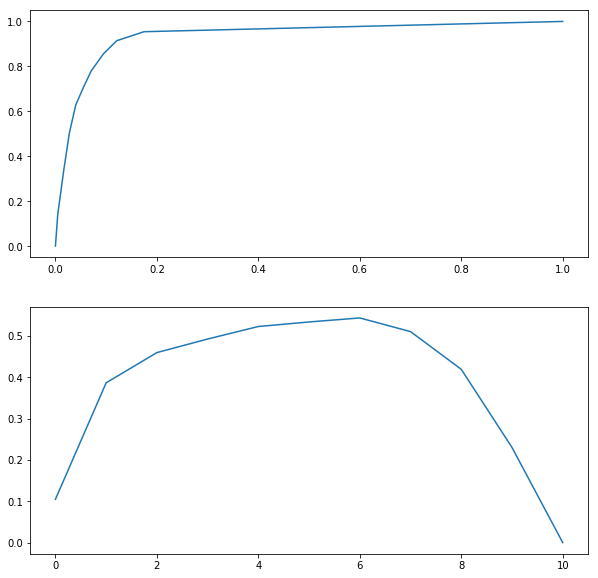

In [319]:
from sklearn.metrics import f1_score

probs = pd.DataFrame(xg_fit.predict_proba(x_val),columns=['Neg_1', 'Pos_2'])
#print(probs.head(10))
cut_offs = []
tpr      = []#true positive rate / sensitivity
fpr      = []#false positive rate/ specificity
y        = [] 
for cut_off in np.linspace(0,1,11):
    test_pred2  = probs['Pos_2'].apply(lambda v: 1 if v > cut_off else 0)
    tn,fp,fn,tp = confusion_matrix(y_validate, test_pred2, labels =[0,1]).ravel()
    sensitivity = (tp)/(tp+fn)
    specificity = (tn)/(tn+fp)
    cut_offs.append(cut_off)
    tpr.append(sensitivity)
    fpr.append(1-specificity)
    print(y.append(f1_score(y_validate, test_pred2)))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(fpr,tpr)
plt.subplot(2,1,2)
plt.plot(x)

plt.show()


In [348]:

cut_off   = 0.50
probs_val = pd.DataFrame(xg_fit.predict_proba(x_val),columns=['Neg_1', 'Pos_2'])
probs_val = probs_val['Pos_2'].apply(lambda v: 1 if v > cut_off else 0)
print(f1_score(y_validate,probs_val))

probs = pd.DataFrame(xg_fit.predict_proba(x_test),columns=['Neg_1', 'Pos_2'])
probs.head(5)

probs    = probs['Pos_2'].apply(lambda v: 1 if v > cut_off else 0)
probs_df = pd.DataFrame({'serial_number' : test['serial_number'], 
                      'outcome' : probs}, index = None)
probs_df['outcome'] = np.where(probs_df['outcome'] == 0, 'no','yes')
print(probs_df['outcome'].value_counts())

#print(f1_score(y_validate,probs))
probs_df.to_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_17_3.csv',index=False)


0.5396825396825397
no     11153
yes     2409
Name: outcome, dtype: int64


In [216]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_trn, y_train)
predict_val       = mlp.predict(x_val)
predict_test      = mlp.predict(x_test)
print(accuracy_score(y_validate, predict_val)*100)
print(classification_report(y_validate, predict_val))

94.34439178515008
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      5980
          1       0.48      0.34      0.40       350

avg / total       0.94      0.94      0.94      6330



In [370]:
#!pip install lightgbm
import lightgbm as lgb

train_data=lgb.Dataset(x_trn,label=y_train)
#setting parameters for lightgbm
param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'scale_pos_weight':3.5}
#param['metric'] = ['auc', 'binary_logloss']

#training our model using light gbm
num_round=50
#start=datetime.now()
lgbm=lgb.train(param,train_data,num_round)
#stop=datetime.now()

#Execution time of the model
#execution_time_lgbm = stop-start
#execution_time_lgbm

#predicting on test set
ypred2=lgbm.predict(x_val)

print(ypred2.shape)
ypred2
#print(accuracy_score(y_validate,ypred2))
#f1_score(f1_score(y_validate,ypred2))

(6330,)


array([0.00638471, 0.00655985, 0.00757637, ..., 0.0048539 , 0.0048539 ,
       0.01264668])

In [219]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(class_weight='balanced')
model_lr.fit(x_trn, y_train)

predict_lr  = model_lr.predict(x_val)
predict_test= model_lr.predict(x_test)

accuracy_score(y_validate, predict_lr)*100
print(classification_report(y_validate, predict_lr))


             precision    recall  f1-score   support

          0       0.99      0.87      0.92      5980
          1       0.27      0.83      0.41       350

avg / total       0.95      0.87      0.90      6330



In [221]:
sub_16_2 = pd.DataFrame({ 'serial_number' : test['serial_number'], 
                      'outcome_num' : predict_test})
sub_16_2['outcome'] = np.where(sub_16_2['outcome_num'] == 1, 'yes', 'no')
sub_16_2 = sub_16_2.drop('outcome_num', axis = 1)

sub_16_2.to_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_16_2.csv', index=False)
sub_16_2 = pd.read_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_16_2.csv')
sub_16_2['outcome'].value_counts()

no     7702
yes    5860
Name: outcome, dtype: int64

In [222]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(x_trn, y_train)

predict_lr  = model_lr.predict(x_val)
predict_test= model_lr.predict(x_test)

accuracy_score(y_validate, predict_lr)*100
print(classification_report(y_validate, predict_lr))


             precision    recall  f1-score   support

          0       0.96      0.99      0.97      5980
          1       0.55      0.22      0.31       350

avg / total       0.93      0.95      0.94      6330



In [224]:
#from sklearn.linear_model import LogisticRegression

model_lr = KNeighborsClassifier(n_neighbors=3)
model_lr.fit(x_trn, y_train)

predict_lr  = model_lr.predict(x_val)
predict_test= model_lr.predict(x_test)

accuracy_score(y_validate, predict_lr)*100
print(classification_report(y_validate, predict_lr))


             precision    recall  f1-score   support

          0       0.96      0.99      0.97      5980
          1       0.49      0.25      0.33       350

avg / total       0.93      0.94      0.94      6330



In [228]:
!pip install imblearn

  Using cached https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e5/4c/7557e1c2e791bd43878f8c82065bddc5798252084f26ef44527c02262af1/imbalanced_learn-0.4.3-py3-none-any.whl


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [235]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
print(y_train.value_counts())
print(y_train.shape, x_trn.shape)
x_train_res, y_train_res = sm.fit_sample(x_trn,y_train.ravel())
x_train_res.shape,y_train_res.shape

0    23829
1     1490
Name: num_outcome, dtype: int64
(25319,) (25319, 65)


((47658, 65), (47658,))

In [263]:
xg = XGBClassifier(learning_rate=0.5)    
xg_fit           = xg.fit(x_train_res,y_train_res)
predict_xg       = xg_fit.predict(x_val)
test_pred_xg     = xg_fit.predict(x_test)
print('{} learning rate'.format(accuracy_score(y_validate, predict_xg)*100))
print(classification_report(y_validate, predict_xg))

94.06003159557662 learning rate
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      5980
          1       0.47      0.51      0.49       350

avg / total       0.94      0.94      0.94      6330



In [240]:
sub_16_3 = pd.DataFrame({ 'serial_number' : test['serial_number'], 
                      'outcome_num' : test_pred_xg})
sub_16_3['outcome'] = np.where(sub_16_3['outcome_num'] == 1, 'yes', 'no')
sub_16_3 = sub_16_3.drop('outcome_num', axis = 1)

#sub_16_3.to_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_16_3.csv', index=False)
sub_16_3 = pd.read_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_16_3.csv')
sub_16_3['outcome'].value_counts()

no     11669
yes     1893
Name: outcome, dtype: int64

None
None
None
None
None
None
None
None
None
None
None


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  


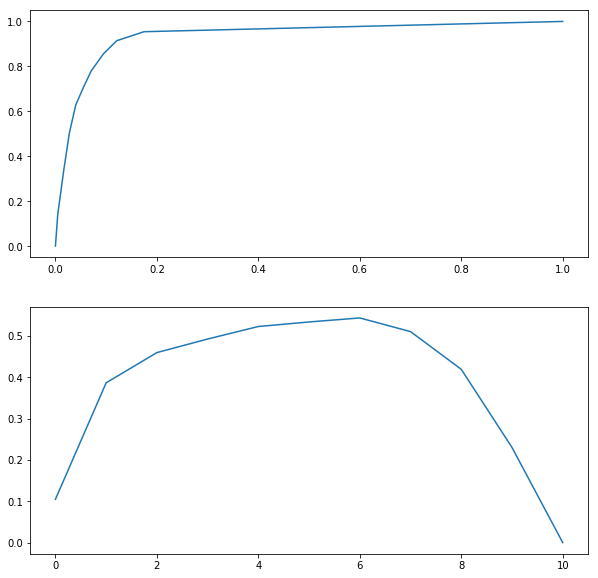

In [317]:
from sklearn.metrics import f1_score

probs = pd.DataFrame(xg_fit.predict_proba(x_val),columns=['Neg_1', 'Pos_2'])
#print(probs.head(10))
cut_offs = []
tpr      = []#true positive rate / sensitivity
fpr      = []#false positive rate/ specificity
x        = [] 
for cut_off in np.linspace(0,1,11):
    test_pred2  = probs['Pos_2'].apply(lambda v: 1 if v > cut_off else 0)
    tn,fp,fn,tp = confusion_matrix(y_validate, test_pred2, labels =[0,1]).ravel()
    sensitivity = (tp)/(tp+fn)
    specificity = (tn)/(tn+fp)
    cut_offs.append(cut_off)
    tpr.append(sensitivity)
    fpr.append(1-specificity)
    print(x.append(f1_score(y_validate, test_pred2)))


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(fpr,tpr)
plt.subplot(2,1,2)
plt.plot(x)

plt.show()


In [281]:
probs = pd.DataFrame(xg_fit.predict_proba(x_test),columns=['Neg_1', 'Pos_2'])
probs.head(5)

cut_off  = 0.40
probs    = probs['Pos_2'].apply(lambda v: 1 if v > cut_off else 0)
probs_df = pd.DataFrame({'serial_number' : test['serial_number'], 
                      'outcome' : probs}, index = None)
probs_df['outcome'] = np.where(probs_df['outcome'] == 0, 'no','yes')
print(probs_df['outcome'].value_counts())


probs_df.to_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_16_8.csv',index=False)


no     11243
yes     2319
Name: outcome, dtype: int64


In [245]:
from sklearn.ensemble import AdaBoostClassifier

trees = [100,200,300,400,500,600,700]

for t in trees:
    knn_mod_1 = AdaBoostClassifier(n_estimators=t)
    knn_mod_1.fit(x_train_res,y_train_res)
    acc_pred  = knn_mod_1.predict(x_val)
    acc_test  = knn_mod_1.predict(x_test)
    print(classification_report(y_validate, acc_pred))
    print('--------------------------------------------------------')

             precision    recall  f1-score   support

          0       0.98      0.93      0.96      5980
          1       0.38      0.73      0.50       350

avg / total       0.95      0.92      0.93      6330

--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      5980
          1       0.40      0.67      0.50       350

avg / total       0.95      0.93      0.94      6330

--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      5980
          1       0.42      0.66      0.51       350

avg / total       0.95      0.93      0.94      6330

--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      5980
          1       0.43      0.63      0.51       350

avg / total       0.95 

In [256]:
knn_mod_1 = AdaBoostClassifier(n_estimators=100)
knn_mod_1.fit(x_train_res,y_train_res)
acc_pred = knn_mod_1.predict(x_val)
acc_test = knn_mod_1.predict(x_test)
print(classification_report(y_validate, acc_pred))
print('--------------------------------------------------------')

             precision    recall  f1-score   support

          0       0.98      0.93      0.96      5980
          1       0.38      0.73      0.50       350

avg / total       0.95      0.92      0.93      6330

--------------------------------------------------------


In [257]:
sub_16_4 = pd.DataFrame({ 'serial_number' : test['serial_number'], 
                      'outcome_num' : acc_test})
sub_16_4['outcome'] = np.where(sub_16_4['outcome_num'] == 1, 'yes', 'no')
sub_16_4 = sub_16_4.drop('outcome_num', axis = 1)

sub_16_4.to_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_16_4.csv', index=False)
sub_16_4 = pd.read_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/sub_16_4.csv')
sub_16_4['outcome'].value_counts()

no     10556
yes     3006
Name: outcome, dtype: int64

In [371]:
knn_mod_1 = KNeighborsClassifier(n_neighbors=7,n_jobs=-1) 
knn_mod_1.fit(x_train_res,y_train_res)
acc_pred = knn_mod_1.predict(x_val)
acc_test = knn_mod_1.predict(x_test)
print(classification_report(y_validate, acc_pred))
print('--------------------------------------------------------')

             precision    recall  f1-score   support

          0       0.98      0.89      0.93      5980
          1       0.25      0.67      0.37       350

avg / total       0.94      0.87      0.90      6330

--------------------------------------------------------


In [372]:
svc           = SVC()

# Train classifier
model_svc     = svc.fit(x_train_res, y_train_res)
predict_svc   = model_svc.predict(x_val)
test_pred     = model_svc.predict(x_test)

print(accuracy_score(y_validate, predict_svc)*100)
print(classification_report(y_validate, predict_svc))

86.91943127962085
             precision    recall  f1-score   support

          0       0.99      0.87      0.93      5980
          1       0.27      0.80      0.40       350

avg / total       0.95      0.87      0.90      6330



In [375]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(x_train_res,y_train_res)
xg_pred = ada.predict(x_val)
xg_test = ada.predict(x_test)
print(classification_report(y_validate, xg_pred))
print('--------------------------------------------------------')

             precision    recall  f1-score   support

          0       0.98      0.93      0.96      5980
          1       0.38      0.73      0.50       350

avg / total       0.95      0.92      0.93      6330

--------------------------------------------------------


In [400]:
import statistics as stat

final_val = []
for i in range(0,len(x_val)):
    final_val = np.append(final_val, stat.mode([acc_pred[i], predict_svc[i], xg_pred[i]]))


print(f1_score(y_validate,final_val))
print('ada f1 {}'.format(f1_score(y_validate, xg_pred)))


0.44897959183673475
ada f1 0.49612403100775193


array([0., 0., 0., ..., 0., 0., 0.])

In [401]:
import statistics as stat

final_pred = []
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, stat.mode([acc_test[i], test_pred[i], xg_test[i]]))

ensem_mode_1 = pd.DataFrame({ 'serial_number' : test['serial_number'], 
                      'outcome_num' : final_pred})
ensem_mode_1['outcome'] = np.where(ensem_mode_1['outcome_num'] == 1, 'yes', 'no')
ensem_mode_1 = ensem_mode_1.drop('outcome_num', axis = 1)

ensem_mode_1.to_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/ensem_mode_1.csv', index=False)
ensem_mode_1 = pd.read_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/ensem_mode_1.csv')
ensem_mode_1['outcome'].value_counts()

no     10092
yes     3470
Name: outcome, dtype: int64

In [413]:
finalpred=pd.DataFrame((acc_pred*0.25+predict_svc*0.25+xg_pred*0.5), columns={'outcome'})
finalpred['outcome'].value_counts()

twik = 0.2
finalpred['outcome']= finalpred['outcome'].apply(lambda v: 1 if v > twik else 0)
finalpred['outcome'].value_counts()

print(f1_score(y_validate,finalpred))
print('ada f1 {}'.format(f1_score(y_validate, xg_pred)))


0.3668020893789901
ada f1 0.49612403100775193


## STACKING

In [533]:
train_dummies = pd.get_dummies(train_final)
test_dummies  = pd.get_dummies(test_final)
train_x = train_dummies.drop('num_outcome', axis = 1)
train_y = train_dummies['num_outcome']
print(train_x.shape, train_y.shape,test_dummies.shape)

scaler   = StandardScaler()
scaling  = scaler.fit(train_x)
x_trn_full    = scaling.transform(train_x)
x_test_full   = scaling.transform(test_dummies)

x_trn_full.shape, x_test_full.shape, train_y.shape
#train_x.columns

(31649, 65) (31649,) (13562, 65)


((31649, 65), (13562, 65), (31649,))

In [540]:
train_x['avg_time'] = train_x['call_duration']/train_x['campaign_contacts']
train_x['avg_time']
test_dummies['avg_time'] = test_dummies['call_duration']/test_dummies['campaign_contacts']


In [554]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
print(train_y.value_counts())
print(train_y.shape, x_trn_full.shape)
x_train_smot_full, y_train_smot_full = sm.fit_sample(x_trn_full,train_y.ravel())

x_col_lev_2,y_col_lev_2 = sm.fit_sample(train_x,train_y.ravel())

level_2_df = pd.DataFrame(x_col_lev_2, columns=train_x.columns)

level_2_features = level_2_df[['call_duration','avg_time']]
print(level_2_features.shape)
level_2_test = test_dummies[['call_duration','avg_time']]
print(x_col_lev_2.shape,y_col_lev_2.shape)
x_train_smot_full.shape,y_train_smot_full.shape



0    29809
1     1840
Name: num_outcome, dtype: int64
(31649,) (31649, 65)
(59618, 2)
(59618, 66) (59618,)


((59618, 65), (59618,))

In [489]:
from sklearn.model_selection import StratifiedKFold
def Stacking(model,train,y,test,n_fold):
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred =np.empty((0,1))
    train_pred=np.empty((0,1))
    for train_indices,val_indices in folds.split(train,y):
        x_train,x_val=train[train_indices],train[val_indices]
        y_train,y_val=y[train_indices],y[val_indices]
        model.fit(x_train,y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
    model.fit(train,y)
    test_pred =np.append(test_pred,model.predict(test))
    return test_pred,train_pred


In [515]:
model1 = XGBClassifier(learning_rate=0.5,n_estimators=130)
test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=x_train_smot_full,y=y_train_smot_full,test=x_test_full)
train_pred1=pd.DataFrame(train_pred1,columns={'XGB'})
test_pred1=pd.DataFrame(test_pred1,columns={'XGB'})

model2 = KNeighborsClassifier(n_neighbors=7)
test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10, train=x_train_smot_full,y=y_train_smot_full,test=x_test_full)
train_pred2=pd.DataFrame(train_pred2, columns={'KNN'})
test_pred2=pd.DataFrame(test_pred2,columns={'KNN'})

model3  = SVC()
test_pred3 ,train_pred3=Stacking(model=model3,n_fold=10, train=x_train_smot_full,y=y_train_smot_full,test=x_test_full)
train_pred3=pd.DataFrame(train_pred3,columns={'SVC'})
test_pred3=pd.DataFrame(test_pred3,columns={'SVC'})

model4  = RandomForestClassifier(n_estimators=200)
test_pred4 ,train_pred4=Stacking(model=model4,n_fold=10, train=x_train_smot_full,y=y_train_smot_full,test=x_test_full)
train_pred4=pd.DataFrame(train_pred4, columns={'RF'})
test_pred4=pd.DataFrame(test_pred4,columns={'RF'})

model5  = LogisticRegression()
test_pred5 ,train_pred5=Stacking(model=model5,n_fold=10, train=x_train_smot_full,y=y_train_smot_full,test=x_test_full)
train_pred5=pd.DataFrame(train_pred5, columns={'logistic'})
test_pred5=pd.DataFrame(test_pred5,columns={'logistic'})


model6 = MLPClassifier(hidden_layer_sizes=(30,35,30))
test_pred6 ,train_pred6=Stacking(model=model6,n_fold=10, train=x_train_smot_full,y=y_train_smot_full,test=x_test_full)
train_pred6=pd.DataFrame(train_pred6, columns={'mlp'})
test_pred6=pd.DataFrame(test_pred6,columns={'mlp'})

model7 = PassiveAggressiveClassifier()
test_pred7 ,train_pred7=Stacking(model=model7,n_fold=10, train=x_train_smot_full,y=y_train_smot_full,test=x_test_full)
train_pred7=pd.DataFrame(train_pred7, columns={'passive'})
test_pred7=pd.DataFrame(test_pred7,columns={'passive'})

from sklearn.ensemble import GradientBoostingClassifier
model8 = GradientBoostingClassifier()
test_pred8 ,train_pred8=Stacking(model=model8,n_fold=10, train=x_train_smot_full,y=y_train_smot_full,test=x_test_full)
train_pred8=pd.DataFrame(train_pred8, columns={'gb'})
test_pred8=pd.DataFrame(test_pred8,columns={'gb'})





C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [555]:
#_col_lev_2 = pd.DataFrame(x_col_lev_2,columns={'call_dur','avg_call'})
#x_col_lev_2

#test_col_lev_2 = pd.DataFrame(test_col_lev_2,columns={'call_dur','avg_call'})
#test_col_lev_2
type(level_2_features)


pandas.core.frame.DataFrame

In [556]:

meta_train = pd.concat([train_pred1, train_pred2,train_pred3,train_pred4,train_pred5,train_pred6,train_pred7,train_pred8,
                        level_2_features], axis=1)
meta_test  = pd.concat([test_pred1,   test_pred2,test_pred3, test_pred4, test_pred5,test_pred6,test_pred7,test_pred8,
                       level_2_test], axis=1)

meta_train.shape, meta_test.shape
#x_train_smot_full.shape,train_pred1.shape, test_pred1.shape,x_test_full.shape
#try_1 = meta_train.copy()
print(meta_train.shape,meta_test.shape)
meta_train['gb'].value_counts()

(59618, 10) (13562, 10)


1.0    33363
0.0    26255
Name: gb, dtype: int64

In [563]:
model = SVC()
model.fit(meta_train,y_train_smot_full)
stacked_pred = model.predict(meta_test)

stacked_df_1 = pd.DataFrame({ 'serial_number' : test['serial_number'], 
                      'outcome_num' : stacked_pred})
stacked_df_1['outcome'] = np.where(stacked_df_1['outcome_num'] == 1, 'yes', 'no')
stacked_df_1 = stacked_df_1.drop('outcome_num', axis = 1)

stacked_df_1.to_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/stacked_df_3.csv', index=False)
stacked_df_3 = pd.read_csv('C:/Users/Administrator/Desktop/ML/Manipal skillenza Datathon/yes bank prac_1/stacked_df_3.csv')
stacked_df_3['outcome'].value_counts()

no     11421
yes     2141
Name: outcome, dtype: int64

149182